#Section2 Project



###데이터 선정 및 문제 설정

*   환자의 뇌졸중 유무를 예측하는 것을 문제로 선정해, 뇌졸중이 걸린 사람들이 어떤 특징을 가지고 있는지 파악할 것입니다. 


가설1. age가 높을수록 뇌졸중에 걸릴 가능성이 높다

가설2. 혈액 내 평균 혈당 지수가 높을수록 뇌졸중에 걸릴 가능성이 높다 

가설3. 체질량 지수가 높을수록 뇌졸증에 걸릴 가능성이 높다 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
stroke =pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##데이터셋 컬럼 설명

1) id: 환자의 아이디

2) gender: 환자의 성별 - "남성", "여성" 또는 "기타"

3) age: 환자의 나이

4) hypertension: 환자의 고혈압 유무 
- 환자가 고혈압이 없으면 0, 고혈압이 있으면 1

5) heart_disease: 환자의 심장 질환 유무
*   환자에게 심장 질환이 없으면 0, 심장 질환이 있으면 1

6) ever_married: 환자의 결혼 여부 
*   "예" 또는 "아니요" 
 
7) work_type: 환자의 직업 상태 
*   "어린이", "공직자", "일을 하지 않는다", "개인" or "자영업"

8) Residence_type: 환자의 거주지 타입 
*    "농촌" 또는 "도시"

9) avg_glucose_level: 환자의 혈액 내 평균 혈당 수준

10) bmi: 환자의 체질량 지수

11) smoking_status: 환자의 흡연여부 
*   "이전에 흡연했었음", "전혀흡연해본 경험이 없음", "흡연중" or "알수없음"


뇌졸중에 관한 링크: https://www.cnuh.co.kr/rcc/sub03_02.do

데이터셋 출처: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [3]:
#컬럼 형태 확인
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#결측치 확인, 중복확인 
print('결측치 확인: ',stroke.isna().sum()) #bmi에서 201개의 결측치 발견
stroke= stroke.fillna(stroke.mean()) #결측치에 BMI지수 평균값 입력해주었음 
print('중복값: ',stroke.duplicated().sum()) # 중복값 0개

결측치 확인:  id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
중복값:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
stroke['gender'].value_counts() #Other의 수 1개
stroke = stroke[(stroke['gender'] != 'Other')]

stroke['gender'].value_counts() 

Female    2994
Male      2115
Name: gender, dtype: int64

##분류를 위하여 베이스라인 설정 

In [6]:
#예측해야하는 target은 stroke
target = 'stroke'
y= stroke[target]

#기준모델 확인 
y.value_counts(normalize= True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

In [7]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

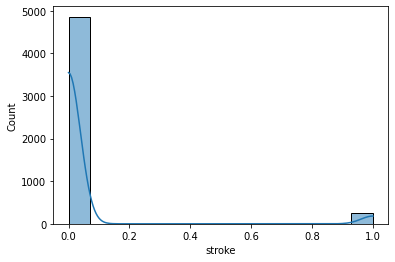

In [8]:
# 타겟변수의 분포도

sns.histplot(stroke['stroke'],kde=True);

 데이터 불균형이 발견되었음 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


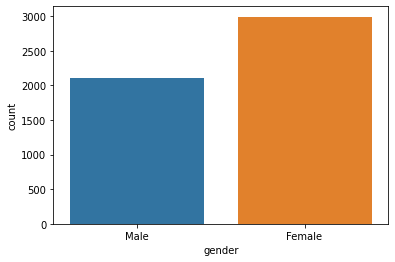

In [9]:
sns.countplot(stroke['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


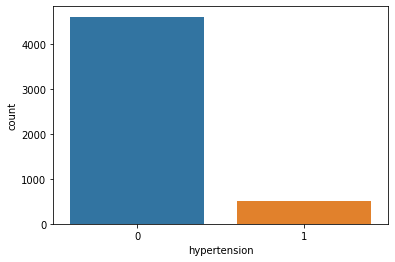

In [10]:
sns.countplot(stroke['hypertension'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


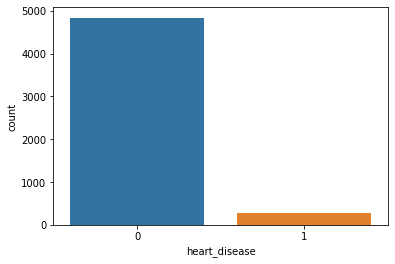

In [11]:
sns.countplot(stroke['heart_disease'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


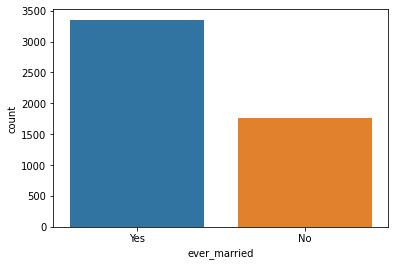

In [12]:
sns.countplot(stroke['ever_married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


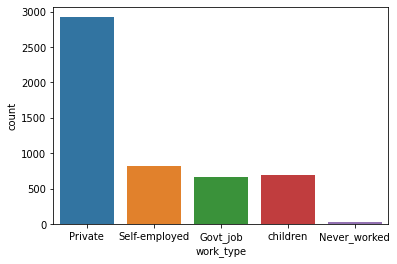

In [13]:
sns.countplot(stroke['work_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


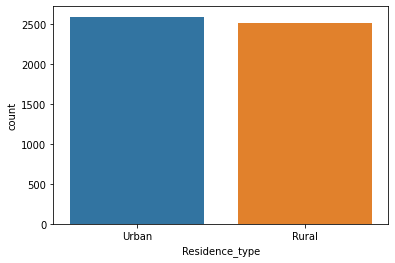

In [14]:
sns.countplot(stroke['Residence_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


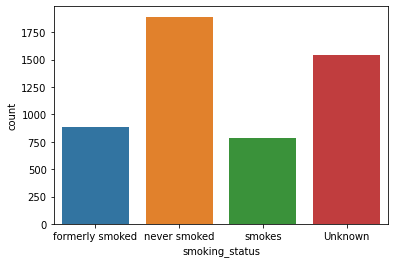

In [15]:
sns.countplot(stroke['smoking_status'])

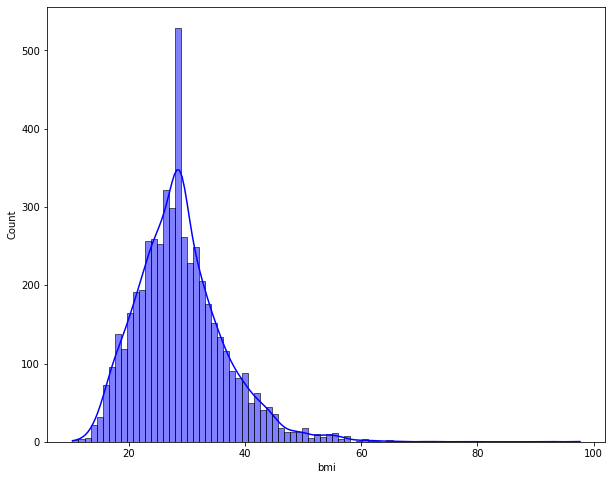

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(stroke['bmi'],kde=True,color='Blue');

In [17]:
stroke['bmi'].value_counts() 

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

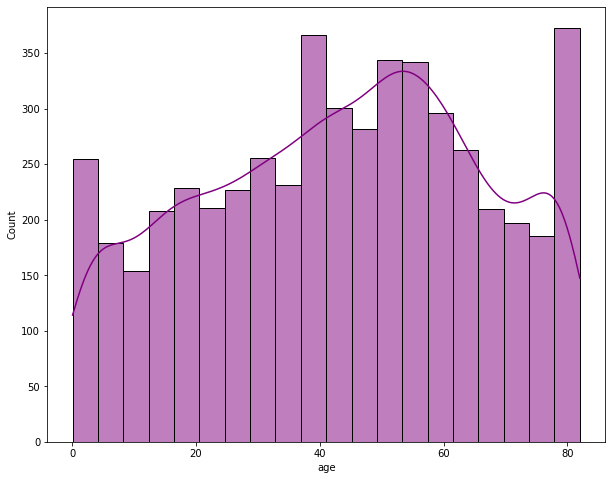

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(stroke['age'],kde=True,color='purple');

In [19]:
stroke['age'].value_counts() 

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

높음 비율?

stroke: 걸리지 않음

gender: 여성

hypertension: 0

heart_disease: 0 

ever_married: 유

worktype: 공직자

residence type: 차이가 없음 

smoking_status: never smoked, unknown

bmi지수: 28.893237 

age: 78세 

#가설1. age가 높을수록 뇌졸중에 걸릴 가능성이 높다

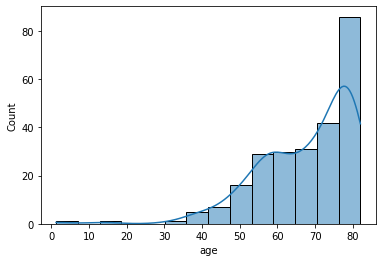

In [20]:
# 가설 1
sa = stroke[stroke['stroke'] == 1]
sns.histplot(sa['age'],kde=True);

- 상단의 분포도를 통해 age가 높을수록 뇌졸중에 걸릴 가능성이 높다는 귀무가설은 채택되었다. 

##가설2. 혈액 내 평균 혈당 지수가 높을수록 뇌졸중에 걸릴 가능성이 높다


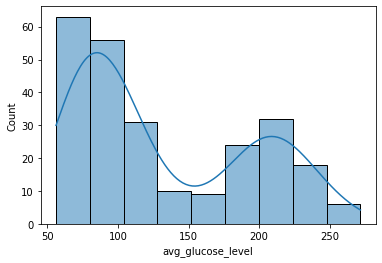

In [21]:
# 가설 2
sa = stroke[stroke['stroke'] == 1]
sns.histplot(sa['avg_glucose_level'],kde=True);

- 상단의 분포도를 통해 혈액 내 평균 혈당 지수가 높을수록 뇌졸중에 걸릴 가능성이 높다는 귀무가설은 기각되었다.
- 혈액 내 평균 혈당 지수가 50~100에 많이 분포되어있다.  

##가설3. 체질량 지수가 높을수록 뇌졸증에 걸릴 가능성이 높다

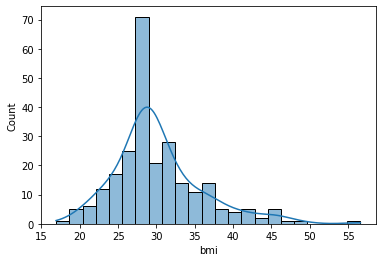

In [22]:
# 가설 2
sa = stroke[stroke['stroke'] == 1]
sns.histplot(sa['bmi'],kde=True);

- 체질량 지수가 높을수록 뇌졸중에 걸릴 가능성이 높다는 귀무가설은 기각되었다. 
- bmi지수가 25~30사이에 많이 분포되어 있음을 알 수 있다. 


In [23]:
s = stroke[stroke['stroke'] == 1]
ns = stroke[stroke['stroke'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


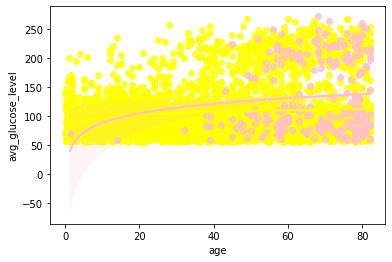

In [24]:
# 나이와 혈당, bmi 비교 
sns.regplot(ns['age'], y=ns['avg_glucose_level'],
            color='yellow',
            logx=True)

sns.regplot(s['age'], y=s['avg_glucose_level'],
            color='pink',
            logx=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


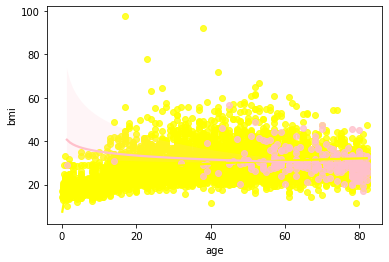

In [25]:
sns.regplot(ns['age'], y=ns['bmi'],
            color='yellow',
            logx=True)

sns.regplot(s['age'], y=s['bmi'],
            color='pink',
            logx=True)

나이와 혈당 수치는 연관이 있음을 알 수 있었다. 

In [26]:
# 범주형 값 인코딩
stroke['gender'] = stroke['gender'].replace({'Male': 0, 'Female': 1}).astype(np.uint8)
stroke['ever_married'] = stroke['ever_married'].replace({'No': 0, 'Yes': 1}).astype(np.uint8)
stroke['work_type'] = stroke['work_type'].replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': -1, 'Never_worked': -2}).astype(np.uint8)
stroke['Residence_type'] = stroke['Residence_type'].replace({'Rural': 0, 'Urban': 1}).astype(np.uint8)
stroke['smoking_status']= stroke['smoking_status'].replace({'never smoked': 1, 'Unknown':2, 'formerly smoked':3, 'smokes':4}).astype(np.uint8)

In [27]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.600000,3,1
1,51676,1,61.0,0,0,1,1,0,202.21,28.893237,1,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.500000,1,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.400000,4,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,0,1,83.75,28.893237,1,0
5106,44873,1,81.0,0,0,1,1,1,125.20,40.000000,1,0
5107,19723,1,35.0,0,0,1,1,0,82.99,30.600000,1,0
5108,37544,0,51.0,0,0,1,0,0,166.29,25.600000,3,0


In [28]:
# 베이스라인
print('Inverse of Null Accuracy: ',249/(249+4860))
print('Null Accuracy: ', 4860/(249+4860))


# 뇌졸중 걸릴 확률을 찾고 있기 때문에 정확도는 약 5%이지만 블균형 데이터셋이기 때문에 
# 반대의 정확도를 베이스라인으로 삼겠습니다.
# 데이터 분리
X = stroke.drop(['stroke', 'smoking_status'], axis=1)
y = stroke['stroke']

Inverse of Null Accuracy:  0.04873752201996477
Null Accuracy:  0.9512624779800353


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4087, 10), (1022, 10), (4087,), (1022,))

In [30]:
# 데이터 세트 불균형으로 균형 맞춰주었음
from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train, y_train = over.fit_resample(X_train, y_train.ravel())

In [31]:
# Random Froest, Logistic Regression, 교차 검증
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf_pipeline = Pipeline(steps = [('scale', StandardScaler()), 
                                ('RF', RandomForestClassifier(random_state=42))])
lr_pipeline = Pipeline(steps = [('scale', StandardScaler()), 
                                ('LR', LogisticRegression(random_state=42))])

In [32]:
from sklearn.model_selection import cross_val_score
rf_cv = cross_val_score(rf_pipeline, X_train, y_train, cv=10, scoring ='f1')
lr_cv = cross_val_score(lr_pipeline, X_train, y_train, cv=10, scoring='f1')

In [33]:
print('Random Forest mean', rf_cv.mean())
print('Logisitic Regression mean', lr_cv.mean())

Random Forest mean 0.9391713891186091
Logisitic Regression mean 0.8274720527721389


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
lr_pred = lr_pipeline.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

rf_f1 = f1_score(y_test, rf_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [35]:
from sklearn.metrics import accuracy_score
print('Random Forest F1 score: ', rf_f1)
print('Logistic regression F1 score: ', lr_f1)

Random Forest F1 score:  0.13496932515337423
Logistic regression F1 score:  0.24742268041237112


In [36]:
from sklearn.metrics import classification_report
print('Accuracy score: ', accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Accuracy score:  0.8620352250489237
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       960
           1       0.11      0.18      0.13        62

    accuracy                           0.86      1022
   macro avg       0.53      0.54      0.53      1022
weighted avg       0.89      0.86      0.88      1022



In [37]:
# recall이 너무 낮다, 그러므로 GridSearchCV 사용해보았음
from sklearn.model_selection import GridSearchCV
n_estimators = [1, 20, 30, 40, 50, 100, 150, 200]
max_features = [1, 2, 3, 4, 5, 6, 7]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap}

In [38]:
rfc = RandomForestClassifier()

In [39]:
grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [1, 20, 30, 40, 50, 100, 150, 200]})

In [40]:
grid.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 50}

In [41]:
rfc = RandomForestClassifier(max_features=4, n_estimators=200, bootstrap=False)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [42]:
print(classification_report(y_test, rfc_pred))
print('Accurac Score: ', accuracy_score(y_test, rfc_pred))
print('F1 Score: ', f1_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       960
           1       0.12      0.18      0.14        62

    accuracy                           0.87      1022
   macro avg       0.53      0.55      0.54      1022
weighted avg       0.90      0.87      0.88      1022

Accurac Score:  0.87279843444227
F1 Score:  0.14473684210526316


In [43]:
# Logistic Regression
penalty = ['l1', '12', 'none']
C = [ 0.001, 0.01, 0.1, 1, 10, 100]
lr_param_grid = {'penalty': penalty, 
                       'C': C}
lr = LogisticRegression()
grid = GridSearchCV(lr, lr_param_grid)

In [44]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', '12', 'none']})

In [45]:
grid.best_params_

{'C': 0.001, 'penalty': 'none'}

In [46]:
lr_pipeline = Pipeline(steps = [('scale', StandardScaler()),
                                       ('LR', LogisticRegression(C=0.001, penalty = 'none', random_state=42))])
lr_pipeline.fit(X_train, y_train)
lr.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [47]:
print(classification_report(y_test, lr_pred))
print('Accuracy Score: ', accuracy_score(y_test, lr_pred))
print('F1 Score: ', f1_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       960
           1       0.16      0.58      0.25        62

    accuracy                           0.79      1022
   macro avg       0.56      0.69      0.56      1022
weighted avg       0.92      0.79      0.84      1022

Accuracy Score:  0.7857142857142857
F1 Score:  0.24742268041237112


In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

lr_prob = lr_pipeline.predict_proba(X_test)
lr_prob = lr_prob[:, 1]
lr_auc = roc_auc_score(y_test, lr_prob)

In [49]:
# roc 곡선 계산
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_prob)

In [50]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='royalblue', linewidth=5)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')
  plt.show

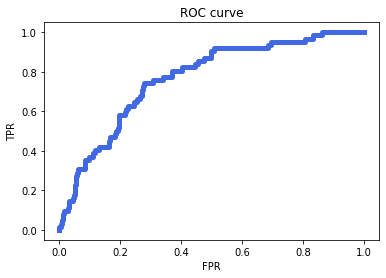

In [51]:
plot_roc_curve(lr_fpr, lr_tpr)

In [52]:
from sklearn.metrics import recall_score, precision_score

rf_df = pd.DataFrame(data=[f1_score(y_test, rf_pred),
                           accuracy_score(y_test, rf_pred),
                           recall_score(y_test, rf_pred),
                           precision_score(y_test,rf_pred),
                           roc_auc_score(y_test, rf_pred)],
                     columns=['Random Forest Score'],
                     index=['F1', 'Accuracy', 'Recall', 'Precision', 'ROC AUC Score'])

lr_df = pd.DataFrame(data=[f1_score(y_test, lr_pred),
                           accuracy_score(y_test, lr_pred),
                           recall_score(y_test, lr_pred),
                           precision_score(y_test, lr_pred),
                           roc_auc_score(y_test, lr_pred)],
                     columns=['Logistic Regression Score'],
                     index=['F1', 'Accuracy', 'Recall', 'Precision', 'ROC AUC Score'])

In [53]:
# 모델 비교 
df_models = round(pd.concat([rf_df, lr_df], axis=1),3)

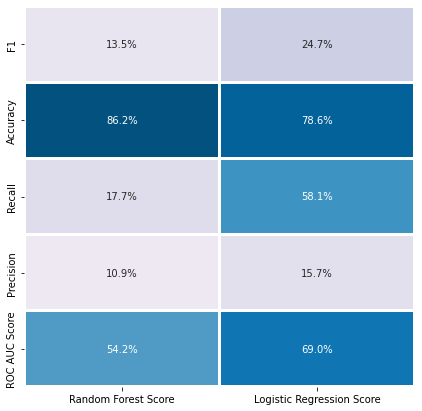

In [54]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(df_models, cmap='PuBu', annot=True, fmt='.1%', vmin=0, vmax=0.95, linewidths=2, cbar=False)
plt.show()

먼저 정확도가 가장 높은 모델인 랜덤포레스트가 어떻게 예측하는지 보기 위해 더 분석을 해보겠습니다.

In [57]:
def rf_importance(m, df):
  return pd.DataFrame({'Feature': df.columns, 
                       'Importance': m.feature_importances_}).sort_values('Importance', ascending=False)
fi = rf_importance(rf_pipeline['RF'], X)

In [58]:
fi.style.background_gradient(cmap='binary')

,Feature,Importance
2,age,0.400966
0,id,0.142140
8,avg_glucose_level,0.137410
9,bmi,0.125973
6,work_type,0.077732
1,gender,0.039060
5,ever_married,0.024050
7,Residence_type,0.024007
3,hypertension,0.016407
4,heart_disease,0.012255


나이, 혈당 수치, bmi, work_type이 중요한 수치임을 알게 되었습니다. 

##SHAP
랜덤포레스트 모델에 사용하였습니다

In [59]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 7.8 MB/s 


In [60]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

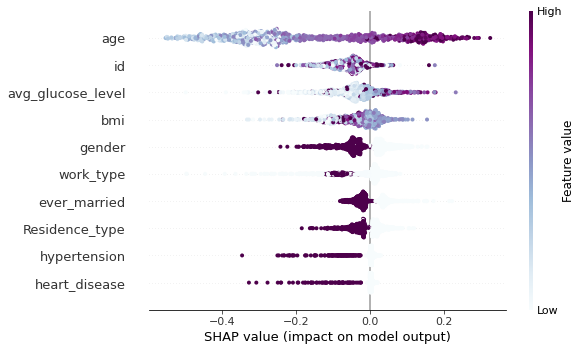

In [61]:
shap.summary_plot(shap_values[1], X_test, cmap='BuPu')

랜덤포레스트 모델이 뇌졸중을 앓지 않은 경우를 예측하는 쪽으로 크게 치우친 것을 볼 수 있습니다.



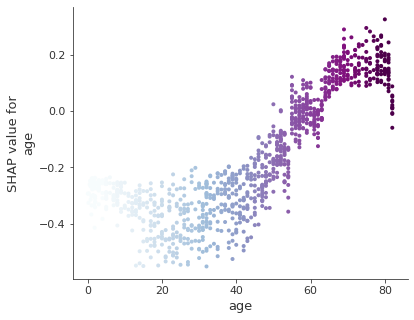

In [62]:
shap.dependence_plot('age', shap_values[1], X_test, interaction_index='age', cmap='BuPu')

나이가 증가하면 shap값도 증가하여 환자를 뇌졸중에 앓는 경우에 더 가깝게 만듭니다.

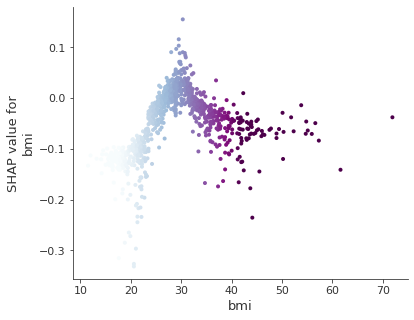

In [63]:
shap.dependence_plot('bmi', shap_values[1], X_test, interaction_index='bmi', cmap='BuPu')

bmi가 30보다 클 경우 뇌졸중이 더 흔해지는 것을 확인했습니다.

로지스틱 회귀 모델이 가장 높은 재현율이 나왔으므로 설명을 위해 eli5를 사용해보겠습니다.

In [64]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 9.8 MB/s 
     |████████████████████████████████| 133 kB 37.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=2f8e7215ad295a083d65e22fd70f90db72332bc2d419b73d4b6034f97eebebeb
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [65]:
import eli5
columns_ = ['age', 'avg_glucose_level', 'bmi', 'work_type','gender','id',
          'ever_married', 'Residence_type', 'hypertension', 'heart_disease']
eli5.show_weights(lr_pipeline.named_steps['LR'], feature_names=columns_)

Weight?,Feature
+2.340,bmi
+0.345,hypertension
+0.339,ever_married
+0.118,age
+0.097,heart_disease
-0.140,<BIAS>
-0.331,gender
-0.375,work_type
-0.492,Residence_type
-0.540,avg_glucose_level


로지스틱 회귀 모델에서는 bmi, 고혈압, 결혼여부, 나이, 심장질환여부가 중요한 변수로 확인되었습니다.